# Установка библиотек

In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install xlsxwriter
!pip install geopandas
!pip install googletrans==4.0.0-rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 992.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=2a64666c20151efe2ce7df00c68c7083487819d73693279c66162ece7e11f081
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting 

# Подключение библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlsxwriter
import geopandas as gpd
import folium
import time
import tqdm
import json
from googletrans import Translator
from folium import plugins

from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('retina')

# Базовые функции для работы с таблицами
## Чтение данных из файлов

Задаем путь до наших данных

In [160]:
path_to_file = "/content/drive/MyDrive/Работа с таблицами/ТЗ-2024/Файл к заданию. Список студентов бакалавриата .xlsx"

Пользуемся базовой функцией библиотеки pandas для считывания excel файлов

In [161]:
students_df = pd.read_excel(path_to_file)

In [162]:
students_df.head(5)

,ФИО,Курс,Образовательная программа,Выбранный майнор,Степень / квалификация,Вид места,Является бюджетным,Направление,Специализация,Учебный год окончания обучения,Факультет,Филиал,Форма обучения,Продолжительность обучения,Гражданство,Способ поступления
0,Студент 1,2 курс,Международные отношения,2019 Китай: грани культуры,Бакалавр,По межправительственным соглашениям,Да,41.03.05 Международные отношения,NaN,2022/2023 учебный год,факультет мировой экономики и мировой политики,Москва,очная форма обучения,4.0,Социалистическая Республика Вьетнам,Зачислен в рамках установленной Правительством...
1,Студент 2,2 курс,Востоковедение,2019 Азия - модели альтернативной глобализации,Бакалавр,По межправительственным соглашениям,Да,58.03.01 Востоковедение и африканистика,NaN,2023/2024 учебный год,факультет мировой экономики и мировой политики,Москва,очная форма обучения,5.0,Социалистическая Республика Вьетнам,Зачислен в рамках установленной Правительством...
2,Студент 3,2 курс,Международные отношения,2019 Спортивный менеджмент,Бакалавр,По межправительственным соглашениям,Да,41.03.05 Международные отношения,NaN,2022/2023 учебный год,факультет мировой экономики и мировой политики,Москва,очная форма обучения,4.0,Социалистическая Республика Вьетнам,Зачислен в рамках установленной Правительством...
3,Студент 4,2 курс,Журналистика,2019 Китай: грани культуры,Бакалавр,По межправительственным соглашениям,Да,42.03.02 Журналистика,NaN,2022/2023 учебный год,"факультет коммуникаций, медиа и дизайна",Москва,очная форма обучения,4.0,Социалистическая Республика Вьетнам,Зачислен в рамках установленной Правительством...
4,Студент 5,2 курс,Международные отношения,2019 Бизнес-информатика,Бакалавр,По межправительственным соглашениям,Да,41.03.05 Международные отношения,NaN,2022/2023 учебный год,факультет мировой экономики и мировой политики,Москва,очная форма обучения,4.0,Социалистическая Республика Вьетнам,Зачислен в рамках установленной Правительством...


Краткую информацию о данных в таблице можно получить, вызвав метод `info()`

In [ ]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34061 entries, 0 to 34060
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ФИО                             34061 non-null  object 
 1   Курс                            34061 non-null  object 
 2   Образовательная программа       34052 non-null  object 
 3   Выбранный майнор                22271 non-null  object 
 4   Степень / квалификация          34058 non-null  object 
 5   Вид места                       34061 non-null  object 
 6   Является бюджетным              34061 non-null  object 
 7   Направление                     34061 non-null  object 
 8   Специализация                   5871 non-null   object 
 9   Учебный год окончания обучения  34061 non-null  object 
 10  Факультет                       34061 non-null  object 
 11  Филиал                          34061 non-null  object 
 12  Форма обучения                  

## Первичная обработка

#### Приведение имен столбцов к удобному для работы формату
Нам часто придется обращаться к столбцам по его имени, поэтому будет удобно стилизировать их вид

In [166]:
# Сохраним начальные имена столбцов
columns_init = students_df.columns

# Изменим имена стоблцов на более удобные для работы
students_df = students_df.rename(
    mapper=lambda x: x.replace(' ', '_').replace('/', '').lower(),
    axis='columns'
)


#### Заполнение пропусков


* Майнор

In [167]:
students_df.loc[students_df['выбранный_майнор'].isna(), 'выбранный_майнор'] = 'отсутствует'

* Степень / кваалификация \\

Тут изначально известно, что работаем только с бакалаврами, поэтому информации этот стоблец не несет. Значит, просто перезапишем весь столбец

In [168]:
students_df.loc[:, 'степень__квалификация'] = 'бакалавр'

* Образовательная программа

Здесь хочется посмотреть, можно ли восстановить пропущенные значения образовательной программы по направлению.
Вначале посмотрим для каких случаев пропущены значения

In [169]:
students_df.loc[students_df['образовательная_программа'].isna()]

,фио,курс,образовательная_программа,выбранный_майнор,степень__квалификация,вид_места,является_бюджетным,направление,специализация,учебный_год_окончания_обучения,факультет,филиал,форма_обучения,продолжительность_обучения,гражданство,способ_поступления,направление_код,направление_название
839,Студент 840,1 курс,NaN,отсутствует,бакалавр,Коммерческие,Нет,38.03.01 Экономика,NaN,2024/2025 учебный год,Международный институт экономики и финансов,Москва,очная форма обучения,NaN,Российская Федерация,Зачислен на основании договора,38.03.01,Экономика
1617,Студент 1618,3 курс,NaN,2018 Религии мира: традиции и тексты,бакалавр,Коммерческие,Нет,38.03.02 Менеджмент,NaN,2020/2021 учебный год,Высшая школа бизнеса,Москва,очная форма обучения,NaN,Российская Федерация,Зачислен на основании договора,38.03.02,Менеджмент
1709,Студент 1710,4 курс,NaN,отсутствует,бакалавр,Коммерческие,Нет,38.03.01 Экономика,Экономика,2020/2021 учебный год,Международный институт экономики и финансов,Москва,очная форма обучения,NaN,Российская Федерация,Зачислен на основании договора,38.03.01,Экономика
3461,Студент 3462,2 курс,NaN,2019 Безопасность предпринимательской деятельн...,бакалавр,Коммерческие,Нет,38.03.02 Менеджмент,NaN,2022/2023 учебный год,Высшая школа бизнеса,Москва,очная форма обучения,NaN,Российская Федерация,Зачислен на основании договора,38.03.02,Менеджмент
6311,Студент 6312,4 курс,NaN,отсутствует,бакалавр,Коммерческие,Нет,38.03.01 Экономика,Банковское дело и финансы,2020/2021 учебный год,Международный институт экономики и финансов,Москва,очная форма обучения,NaN,Российская Федерация,Зачислен на основании договора,38.03.01,Экономика
17155,Студент 17156,1 курс,NaN,отсутствует,бакалавр,Коммерческие,Нет,38.03.02 Менеджмент,NaN,2023/2024 учебный год,Высшая школа бизнеса,Москва,очная форма обучения,NaN,Российская Федерация,Зачислен на основании договора,38.03.02,Менеджмент
18770,Студент 18771,2 курс,NaN,2018 Нейросетевые технологии,бакалавр,Коммерческие места для иностранных граждан,Нет,38.03.02 Менеджмент,NaN,2021/2022 учебный год,Высшая школа бизнеса,Москва,очная форма обучения,NaN,Республика Беларусь,Зачислен на основании договора в рамках отдель...,38.03.02,Менеджмент
25246,Студент 25247,4 курс,NaN,2016 Инструменты эффективной коммуникации: рас...,бакалавр,Коммерческие,Нет,54.03.01 Дизайн,Дизайн и программирование,2020/2021 учебный год,"факультет коммуникаций, медиа и дизайна",Москва,очная форма обучения,NaN,Российская Федерация,Зачислен на основании договора,54.03.01,Дизайн
30234,Студент 30235,2 курс,NaN,2019 Советская и постсоветская культура: полит...,бакалавр,Коммерческие,Нет,54.03.01 Дизайн,NaN,2022/2023 учебный год,"факультет коммуникаций, медиа и дизайна",Москва,очная форма обучения,NaN,Российская Федерация,Зачислен на основании договора,54.03.01,Дизайн


In [170]:
students_df['направление_код'] = students_df['направление'].apply(lambda x: x.split()[0])
students_df['направление_название'] = students_df['направление'].apply(lambda x: ' '.join(x.split()[1:]))

In [171]:
tmp = students_df.query('направление_код == "38.03.02"')
tmp[['образовательная_программа' , 'направление_код', 'направление_название']]

,образовательная_программа,направление_код,направление_название
8,Международный бизнес и менеджмент,38.03.02,Менеджмент
15,Экономика и управление компанией,38.03.02,Менеджмент
16,Маркетинг и рыночная аналитика,38.03.02,Менеджмент
25,Управление бизнесом,38.03.02,Менеджмент
29,Управление бизнесом,38.03.02,Менеджмент
...,...,...,...
34040,Управление бизнесом,38.03.02,Менеджмент
34041,Организация и управление предприятием (о/з),38.03.02,Менеджмент
34049,Маркетинг и рыночная аналитика,38.03.02,Менеджмент
34054,Управление бизнесом,38.03.02,Менеджмент


Все-таки однозначного соответствия не находится, поэтому снова ставим заглушку

In [172]:
students_df.loc[students_df['образовательная_программа'].isna()] = 'не указана'

* Специализация


In [ ]:
students_df.loc[students_df['специализация'].isna(), 'специализация'] = 'не указана'

Все пропуски обработаны, чтобы убедиться снова смотрим информацию о таблице

In [173]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34061 entries, 0 to 34060
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   фио                             34061 non-null  object
 1   курс                            34061 non-null  object
 2   образовательная_программа       34061 non-null  object
 3   выбранный_майнор                34061 non-null  object
 4   степень__квалификация           34061 non-null  object
 5   вид_места                       34061 non-null  object
 6   является_бюджетным              34061 non-null  object
 7   направление                     34061 non-null  object
 8   специализация                   5877 non-null   object
 9   учебный_год_окончания_обучения  34061 non-null  object
 10  факультет                       34061 non-null  object
 11  филиал                          34061 non-null  object
 12  форма_обучения                  34061 non-null

#### Обработка значений в таблице
По аналогии с названием столбцов имеет смысл одинаково стилизировать содержимое колонок. По большому счету это делается, чтобы избежать случаев, когда при обработке и построении графиков слова `Бакалавр` и `бакалавр` не распознавались как разные

In [174]:
students_df.tail(3)

,фио,курс,образовательная_программа,выбранный_майнор,степень__квалификация,вид_места,является_бюджетным,направление,специализация,учебный_год_окончания_обучения,факультет,филиал,форма_обучения,продолжительность_обучения,гражданство,способ_поступления,направление_код,направление_название
34058,Студент 34059,4 курс,Программа двух дипломов по экономике НИУ ВШЭ и...,отсутствует,бакалавр,Коммерческие,Нет,38.03.01 Экономика,Экономика и финансы,2020/2021 учебный год,Международный институт экономики и финансов,Москва,очная форма обучения,4.0,Российская Федерация,Зачислен на основании договора,38.03.01,Экономика
34059,Студент 34060,1 курс,Информатика и вычислительная техника,отсутствует,бакалавр,Бюджетные,Да,09.03.01 Информатика и вычислительная техника,NaN,2023/2024 учебный год,Московский институт электроники и математики и...,Москва,очная форма обучения,4.0,Российская Федерация,Зачислен по результатам вступительных испытаний,09.03.01,Информатика и вычислительная техника
34060,Студент 34061,3 курс,Востоковедение,2018 Предпринимательские проекты и стартапы,бакалавр,Бюджетные,Да,58.03.01 Востоковедение и африканистика,NaN,2022/2023 учебный год,Факультет Санкт-Петербургская школа социальных...,НИУ ВШЭ - Санкт-Петербург,очная форма обучения,5.0,Российская Федерация,Зачислен как победитель олимпиады школьников,58.03.01,Востоковедение и африканистика


In [175]:
students_df = students_df.apply(lambda x: x.str.lower(), axis=1)

In [176]:
students_df.tail(3)

,фио,курс,образовательная_программа,выбранный_майнор,степень__квалификация,вид_места,является_бюджетным,направление,специализация,учебный_год_окончания_обучения,факультет,филиал,форма_обучения,продолжительность_обучения,гражданство,способ_поступления,направление_код,направление_название
34058,студент 34059,4 курс,программа двух дипломов по экономике ниу вшэ и...,отсутствует,бакалавр,коммерческие,нет,38.03.01 экономика,экономика и финансы,2020/2021 учебный год,международный институт экономики и финансов,москва,очная форма обучения,NaN,российская федерация,зачислен на основании договора,38.03.01,экономика
34059,студент 34060,1 курс,информатика и вычислительная техника,отсутствует,бакалавр,бюджетные,да,09.03.01 информатика и вычислительная техника,NaN,2023/2024 учебный год,московский институт электроники и математики и...,москва,очная форма обучения,NaN,российская федерация,зачислен по результатам вступительных испытаний,09.03.01,информатика и вычислительная техника
34060,студент 34061,3 курс,востоковедение,2018 предпринимательские проекты и стартапы,бакалавр,бюджетные,да,58.03.01 востоковедение и африканистика,NaN,2022/2023 учебный год,факультет санкт-петербургская школа социальных...,ниу вшэ - санкт-петербург,очная форма обучения,NaN,российская федерация,зачислен как победитель олимпиады школьников,58.03.01,востоковедение и африканистика


Слово `курс` кажется лишним

In [178]:
students_df['курс'] = students_df['курс'].apply(lambda x: x.split()[0])

Аналогично оставим только год окончания

In [179]:
students_df['учебный_год_окончания_обучения'] = students_df['учебный_год_окончания_обучения'].apply(lambda x: x.split()[0])

Мы разбили столбец `направление` на два, поэтому начальный уже не нужен

In [180]:
students_df = students_df.drop(labels=['направление'], axis=1)

## Разбивка данных по году окончания обучения
Предположим, что перед нами стоит задача разделить нашу таблицу по году окончания и записать каждую выборку в отдельный лист одного excel файла

In [ ]:
sorted(students_df['учебный_год_окончания_обучения'].unique())

['1990/1991',
 '2015/2016',
 '2016/2017',
 '2017/2018',
 '2018/2019',
 '2019/2020',
 '2020/2021',
 '2021/2022',
 '2022/2023',
 '2023/2024',
 '2024/2025',
 '2025/2026',
 'не']

In [ ]:
students_df.query('учебный_год_окончания_обучения == "не"')

,фио,курс,образовательная_программа,выбранный_майнор,степень__квалификация,вид_места,является_бюджетным,специализация,учебный_год_окончания_обучения,факультет,филиал,форма_обучения,продолжительность_обучения,гражданство,способ_поступления,направление_код,направление_название
839,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не указана,не указана
1617,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не указана,не указана
1709,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не указана,не указана
3461,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не указана,не указана
6311,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не указана,не указана
17155,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не указана,не указана
18770,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не указана,не указана
25246,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не указана,не указана
30234,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не,не указана,не указана,не указана,не указана,не указана,не указана,не указана,не указана


Здесь идея в том, чтобы найти индексы в общей таблице плохих значений. Далее этот индекс можно использовать для удаления некорректных строк из наших данных

In [181]:
bad_samples = students_df.query('учебный_год_окончания_обучения == "не"').index

In [182]:
students_df = students_df.drop(index=bad_samples, axis=0)\
                         .reset_index(drop=True)

Для удобства выделим года выпуска в отдельную переменную

In [183]:
graduate_years = sorted(students_df['учебный_год_окончания_обучения'].unique())

Посморим на данные

In [184]:
students_df.loc[students_df['учебный_год_окончания_обучения'] == graduate_years[2]]

,фио,курс,образовательная_программа,выбранный_майнор,степень__квалификация,вид_места,является_бюджетным,специализация,учебный_год_окончания_обучения,факультет,филиал,форма_обучения,продолжительность_обучения,гражданство,способ_поступления,направление_код,направление_название
7678,студент 7684,4,логистика и управление цепями поставок,отсутствует,бакалавр,коммерческие,нет,NaN,2016/2017,факультет бизнеса и менеджмента,москва,очная форма обучения,NaN,российская федерация,зачислен на основании договора,38.03.02,менеджмент
27461,студент 27470,4,фундаментальная и прикладная лингвистика,2015 свободный майнор,бакалавр,бюджетные,да,NaN,2016/2017,факультет гуманитарных наук,ниу вшэ - нижний новгород,очная форма обучения,NaN,российская федерация,зачислен по результатам вступительных испытаний,45.03.03,фундаментальная и прикладная лингвистика


Альтернативный способ

In [ ]:
students_df.query('учебный_год_окончания_обучения == @graduate_years[1]')

,фио,курс,образовательная_программа,выбранный_майнор,степень__квалификация,вид_места,является_бюджетным,специализация,учебный_год_окончания_обучения,факультет,филиал,форма_обучения,продолжительность_обучения,гражданство,способ_поступления,направление_код,направление_название
10710,студент 10716,3,фундаментальная и компьютерная лингвистика,2018 инструменты эффективной коммуникации: рас...,бакалавр,коммерческие,нет,не указана,2015/2016,факультет гуманитарных наук,москва,очная форма обучения,NaN,российская федерация,зачислен на основании договора,45.03.03,фундаментальная и прикладная лингвистика


## Форматирование таблиц Excel

Покажем здесь как можно записывать данные из python в excel формат

Для начала восстановим наши машинные названия колонок в более человеческий формат

In [185]:
new_columns = students_df.rename(
                mapper=lambda x: x.replace('__', '_').replace('_', ' ').title(),
                axis='columns'
              ).columns


In [ ]:
path_to_write = '/content/drive/MyDrive/Работа с таблицами/бакалавры.xlsx'

In [ ]:
tmp = students_df.loc[students_df['учебный_год_окончания_обучения'] == graduate_years[0]]
tmp.head(2)

,фио,курс,образовательная_программа,выбранный_майнор,степень__квалификация,вид_места,является_бюджетным,специализация,учебный_год_окончания_обучения,факультет,филиал,форма_обучения,продолжительность_обучения,гражданство,способ_поступления,направление_код,направление_название
9065,студент 9071,4,фундаментальная и прикладная лингвистика,2017 право,бакалавр,коммерческие,нет,не указана,1990/1991,факультет гуманитарных наук,ниу вшэ - нижний новгород,очная форма обучения,NaN,российская федерация,зачислен на основании договора,45.03.03,фундаментальная и прикладная лингвистика
9491,студент 9497,4,реклама и связи с общественностью,2017 прикладной статистический анализ,бакалавр,коммерческие места для иностранных граждан,нет,исследования в коммуникациях,1990/1991,"факультет коммуникаций, медиа и дизайна",москва,очная форма обучения,NaN,китайская народная республика,зачислен на основании договора в рамках отдель...,42.03.01,реклама и связи с общественностью


Теперь создадим объект `writer`, который будет обрабатывать данные из нашей таблицы и преобразовывать их excel файл

In [186]:
writer = pd.ExcelWriter(path_to_write, engine='xlsxwriter')

for year in graduate_years:
    tmp = students_df.loc[students_df['учебный_год_окончания_обучения'] == year]
    tmp.columns = new_columns
    tmp.to_excel(writer, sheet_name=year.replace('/', '-'))
writer.close()

Таблица в формате excel получилась смятой, поэтому добавим формат ячеек, чтобы сделать excel файл читаемым

In [ ]:
writer = pd.ExcelWriter(path_to_write, engine='xlsxwriter')
for year in graduate_years:
    tmp = students_df.loc[students_df['учебный_год_окончания_обучения'] == year]
    tmp.columns = new_columns
    year = year.replace('/', '-')
    tmp.to_excel(writer, sheet_name=year, index=0)
    workbook  = writer.book
    worksheet = writer.sheets[year]

    for i, col in enumerate(tmp.columns):

        column_len = max(tmp[col].astype(str).map(len).max(), len(col) + 10)
        cell_format = workbook.add_format({'align': 'center'})
        worksheet.set_column(i, i, column_len, cell_format)

        header_format = workbook.add_format({'align': 'center', 'bold': True})
        for col_num, value in enumerate(tmp.columns):
            worksheet.write(0, col_num, value, header_format)
    tmp.to_excel(writer, sheet_name=year)
writer.close()

# Статистика и визуализация данных


* Посмотрим сколько человек записаны на майноры по годам

In [ ]:
mask = students_df['выбранный_майнор'] != 'отсутствует'

In [ ]:
res1 = pd.pivot_table(
        data=students_df.loc[mask],
        index='учебный_год_окончания_обучения',
        values='гражданство',
        aggfunc='count',
        fill_value=0
).reset_index()
res1.columns = ['Год', 'Количество']

<Axes: xlabel='Количество', ylabel='Год'>

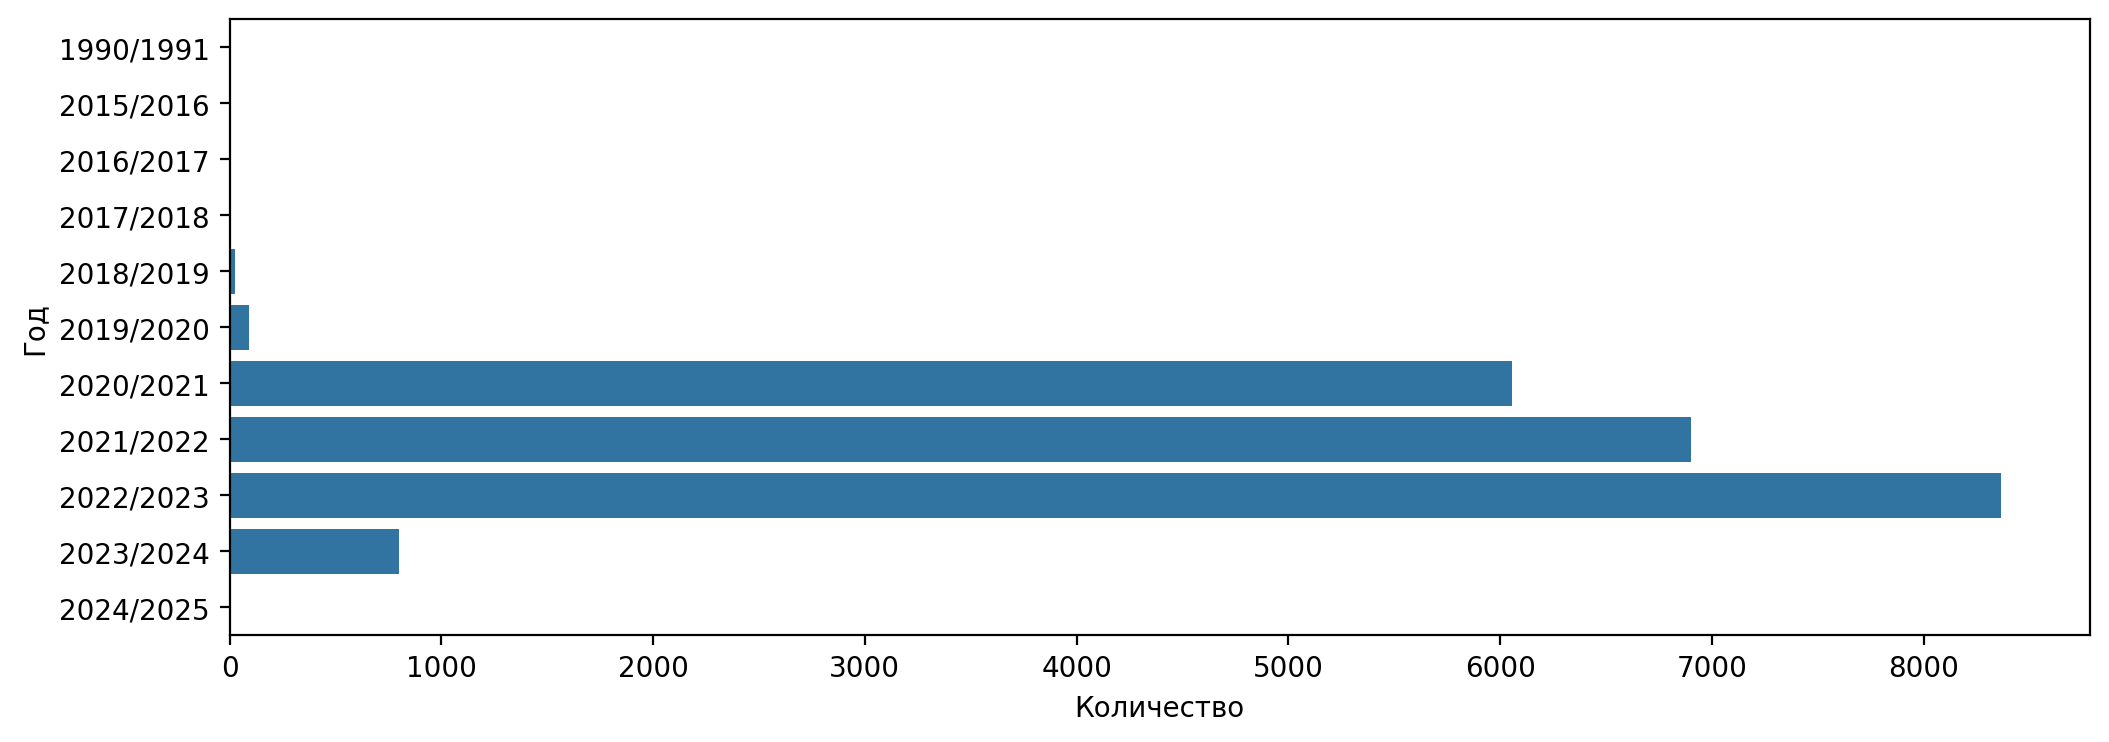

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.barplot(ax=ax, x=res1['Количество'], y=res1["Год"])

In [ ]:
res1

,Год,Количество
0,1990/1991,9
1,2015/2016,1
2,2016/2017,1
3,2017/2018,6
4,2018/2019,24
5,2019/2020,94
6,2020/2021,6058
7,2021/2022,6901
8,2022/2023,8365
9,2023/2024,802


* Посмотрим сколько человек заканчивает обучение, начиная с 2021 года

In [ ]:
countries = ['республика беларусь', "украина", "республика узбекистан", "республика молдова", "киргизская ресбуплика"]
list_ = sorted(students_df['учебный_год_окончания_обучения'].unique())
list_ = list_[-6:]

In [ ]:
list_

['2020/2021', '2021/2022', '2022/2023', '2023/2024', '2024/2025', '2025/2026']

In [ ]:
res2 = pd.pivot_table(
        data=students_df.query('учебный_год_окончания_обучения in @list_ and гражданство in @countries'),
        index=['учебный_год_окончания_обучения'],
        columns=['гражданство'],
        values='курс',
        aggfunc='count',
        fill_value=0
)

In [ ]:
res2.columns.name = ''


In [ ]:
res2

,республика беларусь,республика молдова,республика узбекистан,украина
учебный_год_окончания_обучения,,,,
2020/2021,28,47,90,33
2021/2022,63,34,90,26
2022/2023,84,45,212,43
2023/2024,119,59,205,41
2024/2025,12,5,27,2


<Axes: ylabel='учебный_год_окончания_обучения'>

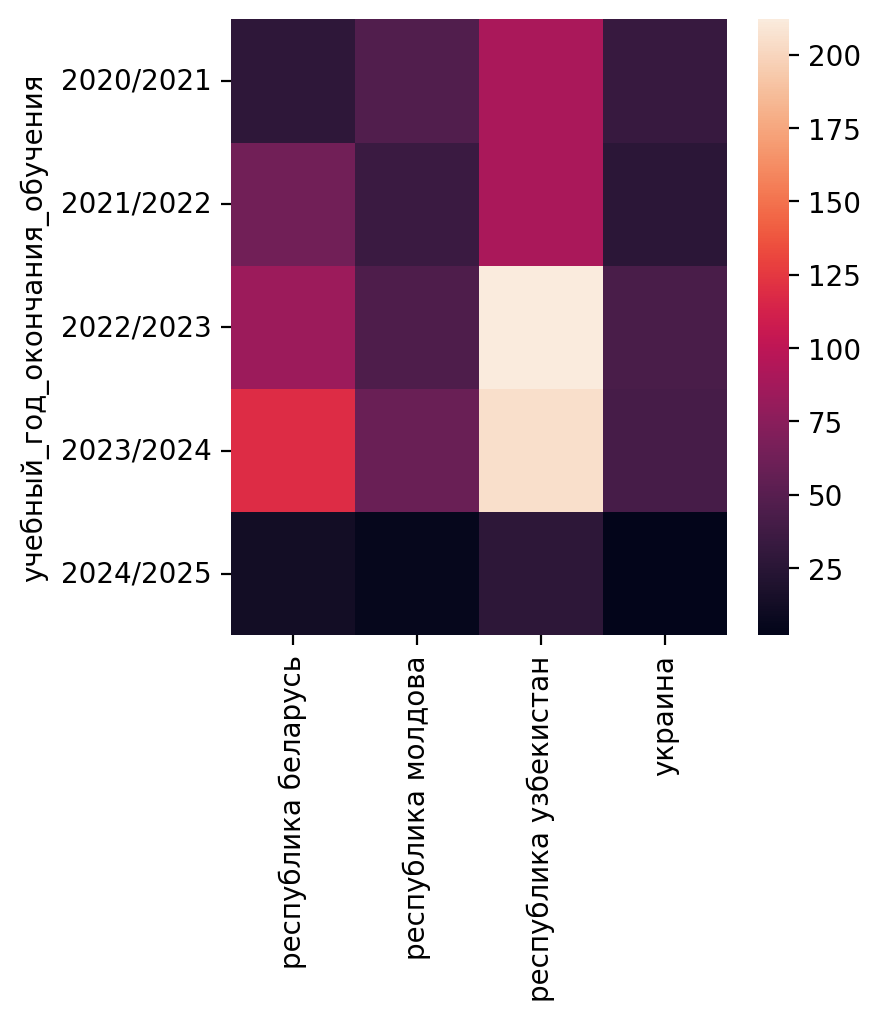

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.heatmap(ax=ax, data=res2)

* Посмотрим на распеределение российских студентов по курсам за 2019/2020 год

In [ ]:
mask = (students_df['гражданство'] == 'российская федерация') & (students_df['учебный_год_окончания_обучения'] == '2019/2020')
tmp = students_df.loc[mask, ['курс']]


In [ ]:
pie_data = tmp.value_counts()\
              .reset_index()\
              .sort_values(by='курс')
pie_data

,курс,count
3,1,2
2,2,20
1,3,37
0,4,78


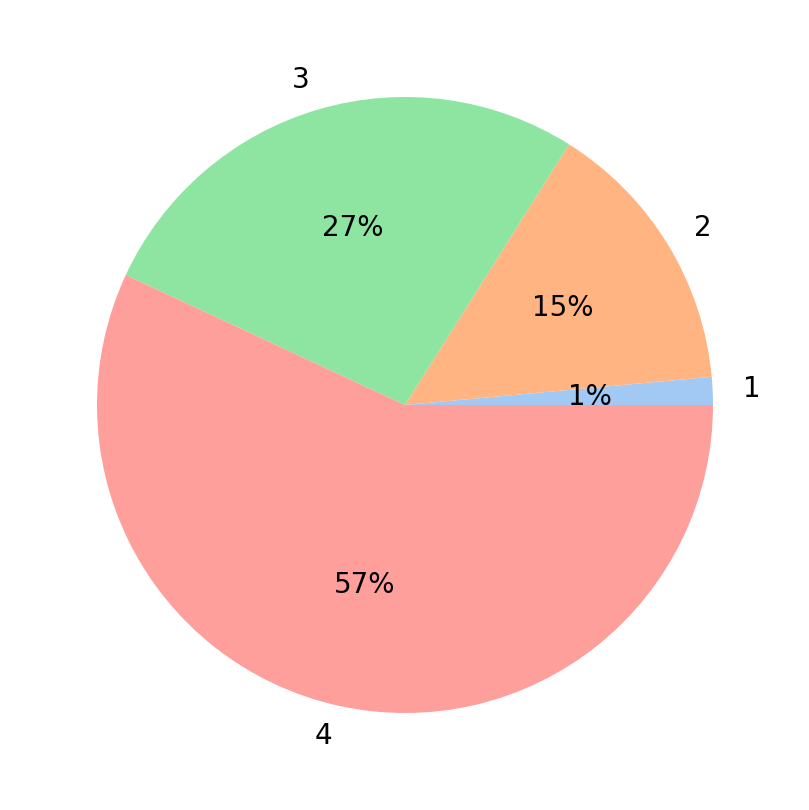

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
colors = sns.color_palette('pastel')[ 0:5 ]
ax.pie(labels=pie_data['курс'], colors=colors,  autopct='%.0f%%', x=pie_data['count']);

* Тепловая карта студентов

In [ ]:
countries_counter = students_df.groupby(by='гражданство').agg(количество=('фио', 'count'))
countries_counter.index.name = 'страна'
countries_counter = countries_counter.reset_index()

In [ ]:
countries_counter

,страна,количетсво
0,абхазия,11
1,австралия,2
2,австрийская республика,1
3,азербайджан,34
4,алжирская народная демократическая республика,4
...,...,...
80,швейцарская конфедерация,1
81,швеция,1
82,эстония,18
83,южно-африканская республика,1


Загрузим карту

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-49-1902369eb8ba>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
sorted(world.name.unique())[:5]

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica']

Все страны на английском языке, в нашем датасете на русском, поэтому
воспользуемся google переводчиком и изменим названия в нашем датасете

Пробуем переводчик

In [ ]:
translator = Translator()
translated_text = translator.translate('Привет, как дела?', src='ru', dest='en')
translated_text.text


'Hi, how are you?'

In [ ]:
def translate(phrase, translator):
    translated_text = translator.translate(phrase, src='ru', dest='en')
    return translated_text.text

In [ ]:
translate('абхазия', translator)

'Abkhazia'

In [ ]:
translated = {}
for name in tqdm.tqdm_notebook(countries_counter['страна'].unique()):
    time.sleep(0.3)
    translated[name] = translate(name.replace('республика', ''), translator)


<ipython-input-54-cae11298620e>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name in tqdm.tqdm_notebook(countries_counter['страна'].unique()):


  0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
translated['российская федерация'] = 'Russia'

In [ ]:
countries_counter['direct_translate'] = countries_counter['страна'].apply(lambda x: translated[x])

In [ ]:
gdf = world[world.name.isin(countries_counter['direct_translate'])]

In [ ]:
gdf['index'] = -1

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
countries_counter

,index,страна,количетсво,direct_translate
0,0,абхазия,11,Abkhazia
1,1,австралия,2,Australia
2,2,австрийская республика,1,Austrian
3,3,азербайджан,34,Azerbaijan
4,4,алжирская народная демократическая республика,4,Algerian folk democratic
...,...,...,...,...
80,80,швейцарская конфедерация,1,Swiss Confederation
81,81,швеция,1,Sweden
82,82,эстония,18,Estonia
83,83,южно-африканская республика,1,South African


In [ ]:
for i, row in world.iterrows():
    for j, row2 in countries_counter.iterrows():
        if row['name'] in row2['direct_translate']:
            gdf.loc[i, 'index'] = j

<ipython-input-104-e4f189132e15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf.loc[i, 'index'] = j


In [ ]:
gdf['index'] = gdf['index'].astype(int)

In [ ]:
countries_counter = countries_counter.reset_index(names='index')

In [ ]:
geo_data = pd.merge(gdf, countries_counter , on='index')
geo_data = geo_data[~geo_data['geometry'].isna()]

In [ ]:
geo_data_json = json.loads(geo_data.to_json())
print(geo_data_json['features'])

[{'id': '0', 'type': 'Feature', 'properties': {'pop_est': 18513930.0, 'continent': 'Asia', 'name': 'Kazakhstan', 'iso_a3': 'KAZ', 'gdp_md_est': 181665.0, 'index': 49, 'страна': 'республика казахстан', 'количетсво': 731, 'direct_translate': 'Kazakhstan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[87.35997033076265, 49.21498078062912], [86.59877648310336, 48.549181626980626], [85.7682328633083, 48.45575063739699], [85.72048383987067, 47.452969468773105], [85.16429039911324, 47.0009557155161], [83.18048383986047, 47.33003123635086], [82.45892581576906, 45.539649563166506], [81.9470707539181, 45.31702749285312], [79.96610639844141, 44.91751699480463], [80.86620649610126, 43.18036204688101], [80.1801501809943, 42.92006785742694], [80.2599902688853, 42.34999929459906], [79.64364546094012, 42.49668284765953], [79.14217736197978, 42.85609243424952], [77.65839196158322, 42.96068553320826], [76.00035363149846, 42.98802236589067], [75.63696495962202, 42.87789988867668], [74.21286583852256

In [ ]:
m = folium.Map(location=[0, 0], zoom_start=2)
for mo in geo_data_json['features']:
    gj = folium.GeoJson(
        data=mo,
        control=False,
        highlight_function=lambda x:{"fillOpacity":0.8, "opacity":0.8},
        smooth_factor=0
    )
    gj.add_to(m)

m

In [ ]:
def style(feature):
    fillOpacity = 0.6
    if 100 * (feature['properties'][col] / maxn) < 0:
        color = 'gray'
        fillOpacity = 0.1
    if 100 * (feature['properties'][col] / maxn)>0: #0 - 20%
        color = "#90EE90"
    if 100 * (feature['properties'][col] / maxn)>20: #20 - 40%
        color = '#32CD32'
    if 100 * (feature['properties'][col] / maxn)>40: #40 - 60%
        color = '#228B22'
    if 100 * (feature['properties'][col] / maxn)>60: #60 - 80%
        color = '#008000'
    if 100 * (feature['properties'][col] / maxn)>80: #80 - 100%
        color = '#006400'

    return {"fillColor":color, "fillOpacity":fillOpacity,"opacity":0}

In [ ]:
m = folium.Map(location=[0, 0], zoom_start=2)
col = 'количетсво'
maxn = geo_data[col].max()
for mo in geo_data_json['features']:
    gj = folium.GeoJson(
        data=mo,
        style_function=style,
        control=False,
        highlight_function=lambda x:{"fillOpacity":0.8, "opacity":0.8},
        smooth_factor=0
    )
    gj.add_to(m)

m

In [ ]:
 geo_data[col].sort_values(ascending=False).values[:10]

array([31070,   731,   632,   306,   191,   149,    73,    54,    40,
          37])

In [ ]:
m = folium.Map(location=[0, 0], zoom_start=2)
col = 'количетсво'
maxn = 20
for mo in geo_data_json['features']:
    gj = folium.GeoJson(
        data=mo,
        style_function=style,
        control=False,
        highlight_function=lambda x:{"fillOpacity":0.8, "opacity":0.8},
        smooth_factor=0
    )
    gj.add_to(m)

m

In [ ]:
def popup_html(feature):
    html = f"<h5>Страна {feature['properties']['name']}</h5>"
    html += f"<br><b>Количество</b>: {feature['properties'][col]}"
    return html

In [ ]:
m = folium.Map(location=[0, 0], zoom_start=2)
col = 'количетсво'
maxn = 20
for mo in geo_data_json['features']:
    gj = folium.GeoJson(
        data=mo,
        style_function=style,
        control=False,
        highlight_function=lambda x:{"fillOpacity":0.8, "opacity":0.8},
        smooth_factor=0
    )
    gj.add_to(m)
    folium.Popup(popup_html(mo)).add_to(gj)
m